In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [27]:
data = pd.read_csv("../data/raw.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Số lần nhân bản
n_augmentations = 1

augmented_data = []

for index, row in data.iterrows():
    # Lấy cột label
    label = row['label']

    # Lấy các giá trị pixel từ hàng hiện tại
    pixels = row.drop('label').values
    original_image = pixels.reshape(28, 28).astype(np.uint8)

    for i in range(n_augmentations):
        # Tạo một bản sao của ảnh
        augmented_image = original_image.copy()

        # Ngẫu nhiên xoay ảnh trong khoảng -5 đến 5 độ
        rotation_angle = np.random.uniform(-5, 5)
        rotation_matrix = cv2.getRotationMatrix2D((original_image.shape[1] / 2, original_image.shape[0] / 2), rotation_angle, 1)
        augmented_image = cv2.warpAffine(augmented_image, rotation_matrix, (original_image.shape[1], original_image.shape[0]))

        # Ngẫu nhiên thay đổi tỷ lệ zoom
        zoom_factor = np.random.uniform(0.9, 1.1)
        augmented_image = cv2.resize(augmented_image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

        # Ngẫu nhiên dịch ảnh dọc
        vertical_shift = np.random.uniform(-0.1, 0.1)
        vertical_pixels = int(vertical_shift * original_image.shape[0])
        transformation_matrix = np.float32([[1, 0, 0], [0, 1, vertical_pixels]])
        augmented_image = cv2.warpAffine(augmented_image, transformation_matrix, (original_image.shape[1], original_image.shape[0]))

        # Ngẫu nhiên lật ảnh theo chiều ngang
        if np.random.random() > 0.5:
            augmented_image = np.fliplr(augmented_image)

        # Ngẫu nhiên lật ảnh theo chiều dọc
        if np.random.random() > 0.5:
            augmented_image = np.flipud(augmented_image)

        # Ngẫu nhiên làm mờ hoặc tạo nhiễu một vài góc nhỏ của ảnh
        # if np.random.random() > 0.5:
        #     x, y = np.random.randint(0, augmented_image.shape[1] - 15), np.random.randint(0, augmented_image.shape[0] - 15)
        #     size = np.random.randint(5, 15)
        #     if x >= 0 and y >= 0:
        #         augmented_image[y:y+size, x:x+size] = np.random.randint(0, 256, size=(size, size))


        # Thêm dữ liệu mới vào danh sách augmented_data
        augmented_data.append(np.insert(augmented_image.flatten(), 0, label))


# Tạo DataFrame mới từ dữ liệu đã được nhân bản và biến đổi
augmented_df = pd.DataFrame(augmented_data, columns=data.columns)

In [29]:
X = augmented_df.iloc[:, 1:]
Y = augmented_df.iloc[:, 0]
X.shape

(42000, 784)

In [30]:
one_hot_y = np.eye(10)[Y]
one_hot_y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
Y = one_hot_y

In [32]:
X.shape, Y.shape

((42000, 784), (42000, 10))

In [33]:
X = X.to_numpy().reshape(-1,28,28,1)
X.shape

(42000, 28, 28, 1)

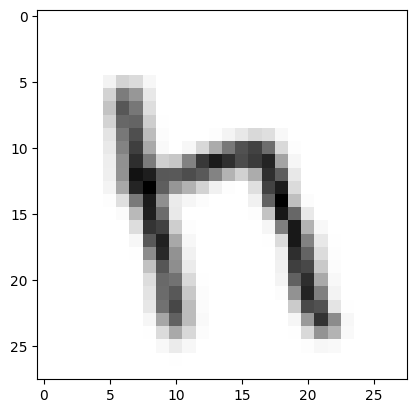

In [34]:
plt.imshow(X[3], cmap=plt.cm.binary)
plt.show()

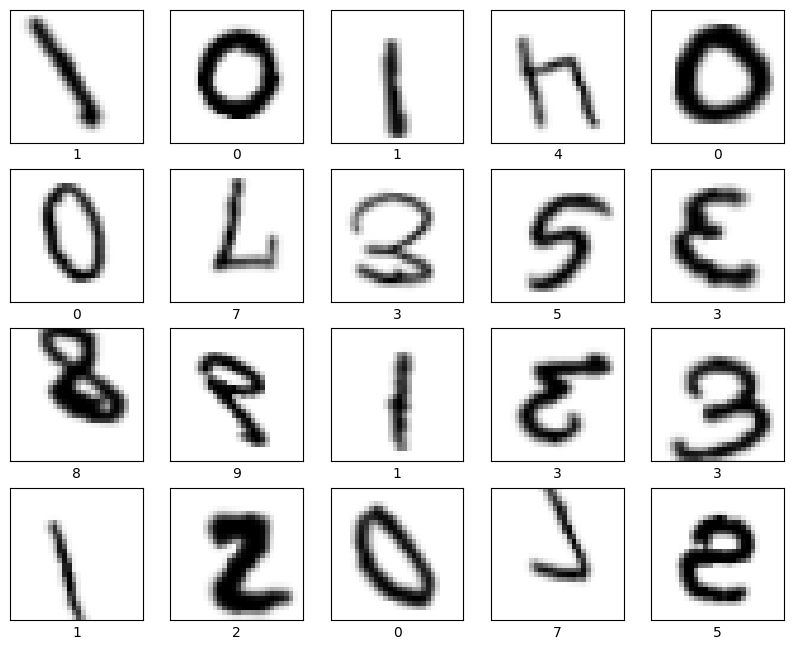

In [35]:
import math
numbers_to_display = 20
num_cells = math.ceil(math.sqrt(numbers_to_display))

plt.figure(figsize = (10, 10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(Y[i]))
# plt.show()

In [36]:
augmented_df.to_csv('../data/random_transform.csv', index=False)